Import Libraries

In [357]:
import tensorflow as tf 
print(tf.__version__)

2.12.0


In [358]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Datasets

In [359]:
df_transport = pd.read_csv("/launching_into_ml/untidy_vehicle_data_toy.csv")
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000.0,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


Check for Data Types

In [360]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        497 non-null    object 
 1   Zip Code    497 non-null    float64
 2   Model Year  497 non-null    object 
 3   Fuel        497 non-null    object 
 4   Make        496 non-null    object 
 5   Light_Duty  496 non-null    object 
 6   Vehicles    496 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.4+ KB


Summary Statistics

In [361]:
df_transport.describe()

,Zip Code,Vehicles
count,497.00000,496.000000
mean,89838.23340,74.512097
std,3633.35609,243.839871
min,9001.00000,1.000000
25%,90001.00000,14.000000
50%,90001.00000,25.000000
75%,90001.00000,56.250000
max,90002.00000,3178.000000


Check data from fule point

In [362]:
#using groupby()
df_transport.groupby('Fuel').first()

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000.0,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000.0,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001.0,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000.0,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001.0,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001.0,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000.0,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001.0,2012,OTHER/UNK,Yes,1.0


Check for null values

In [363]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

Let summarize the data based on Rows, Columns, Features, Unique, Missing values

In [364]:
print("Rows    :",df_transport.shape[0])
print("Columns :",df_transport.shape[1])
print("\nFeatures : \n",df_transport.columns.tolist())
print("\nUnique values : \n",df_transport.nunique())
print("\nMissing values : \n",df_transport.isnull().sum().values.sum())

Rows    : 499
Columns : 7

Features : 
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

Unique values : 
 Date          130
Zip Code        4
Model Year     15
Fuel            8
Make           43
Light_Duty      2
Vehicles      151
dtype: int64

Missing values : 
 17


What Are Our Data Quality Issues?

Data Quality Issue #1:
    Missing Values:

Each feature column has multiple missing values. In fact, we have a total of 18 missing values. 2. Data Quality Issue #2:

Date DataType #2: 
    Date is shown as an "object" datatype and should be a datetime. In addition, Date is in one column. Our business requirement is to see the Date parsed out to year, month, and day.

Data Quality Issue #3:
    Model Year: We are only interested in years greater than 2006, not "<2006".

Data Quality Issue #4:
    Categorical Columns: The feature column "Light_Duty" is categorical and has a "Yes/No" choice. We cannot feed values like this into a machine learning model. In addition, we need to "one-hot encode the remaining "string"/"object" columns.

Data Quality Issue #5:
    Temporal Features: How do we handle year, month, and day?

Data Quality issue #1

In [365]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [366]:
#fill the missing values with most common value
#x.value_counts() how many time x came?
df_transport = df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

Date DataType #2

In [367]:
#pandas to_datetime() function
df_transport["Date"] = pd.to_datetime(df_transport["Date"], format='%m/%d/%Y')
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ KB


In [368]:
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0
2,2018-10-01,90000.0,<2006,Gasoline,OTHER/UNK,Yes,13.0
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,2018-10-01,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


In [369]:
#pharse the date,month and year from Date colunm and create 3 new column
#year,month and date
df_transport["year"] = df_transport["Date"].dt.year
df_transport["month"] = df_transport["Date"].dt.month
df_transport["day"] = df_transport["Date"].dt.day

df_transport.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
 7   year        499 non-null    int32         
 8   month       499 non-null    int32         
 9   day         499 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(4)
memory usage: 33.3+ KB


In [370]:
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
2,2018-10-01,90000.0,<2006,Gasoline,OTHER/UNK,Yes,13.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
4,2018-10-01,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0,2018,10,1


In [371]:
grouped_date = df_transport.groupby("Make").first()
df_transport.groupby("month").first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,day
month,,,,,,,,,
1,2019-01-01,90001.0,2016,Gasoline,Type_G,Yes,18.0,2019,1
2,2019-02-01,90001.0,2017,Gasoline,Type_D,Yes,13.0,2019,1
3,2019-03-01,90001.0,2018,Gasoline,Type_C,Yes,32.0,2019,1
10,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,1
11,2018-11-01,90001.0,2007,Gasoline,Type_M,Yes,15.0,2018,1
12,2018-12-02,90001.0,2015,Gasoline,Type_G,Yes,19.0,2018,2


Text(0.5, 1.0, 'Vehicles by month')

<Figure size 1000x600 with 0 Axes>

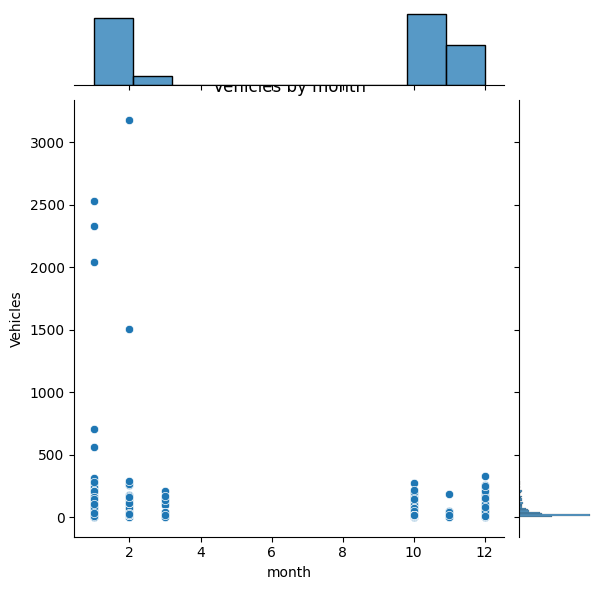

In [372]:
plt.figure(figsize=(10,6))
sns.jointplot(x='month',y='Vehicles',data=df_transport)

plt.title("Vehicles by month")

Data Quality issue #3   
Rename the feature column 


In [373]:
df_transport.columns

Index(['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty',
       'Vehicles', 'year', 'month', 'day'],
      dtype='object')

In [374]:
df_transport.rename(columns = { 'Date': 'date', 
                               'Zip Code':'zipcode', 
                               'Model Year': 'modelyear', 
                               'Fuel': 'fuel', 
                               'Make': 'make', 
                               'Light_Duty': 'lightduty', 
                               'Vehicles': 'vehicles'}, inplace = True) 

# Output the first two rows.
df_transport.head(2)

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1


In [375]:
#copy the dataframe for all the only vale of '2000'
df = df_transport.loc[df_transport.modelyear != '<2006'].copy()

In [376]:
df['modelyear'].value_counts(0)

modelyear
2007    53
2008    45
2006    36
2010    34
2014    31
2015    30
2017    29
2016    29
2013    27
2009    25
2012    25
2011    24
2018    23
2019     5
Name: count, dtype: int64

In [377]:
df['lightduty'].value_counts(0)

lightduty
Yes    374
No      42
Name: count, dtype: int64

In [378]:
#One hot-encoding
#change the value Yes to 1 and No 0
df.loc[:,'lightduty'] = df['lightduty'].apply(lambda x: 0 if x=='No' else 1)
df['lightduty'].value_counts(0)

lightduty
1    374
0     42
Name: count, dtype: int64

In [379]:
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10


In [380]:
# Making dummy variables for categorical data with more inputs.  
data_dummy = pd.get_dummies(df[['zipcode','modelyear', 'fuel', 'make']], drop_first=True).astype(int)

# Output the first five rows.
data_dummy.head()

,zipcode,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,modelyear_2015,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,90000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90001,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,90000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [381]:
df = pd.concat([df,data_dummy], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10,...,0,0,0,0,0,0,0,0,0,0


In [382]:
df = df.drop(['date','zipcode','modelyear', 'fuel', 'make'], axis=1)
df.head()

,lightduty,vehicles,year,month,day,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,16.0,2018,10,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,23.0,2018,10,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [383]:
# Let's print the unique values for "month", "day" and "year" in our dataset. 
print ('Unique values of month:',df.month.unique())
print ('Unique values of day:',df.day.unique())
print ('Unique values of year:',df.year.unique())

Unique values of month: [10 11 12  1  2  3]
Unique values of day: [ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
Unique values of year: [2018 2019]
